In [5]:
import matplotlib.pyplot as plt
import numpy as np 
import cv2 
from skimage.filters import laplace
from skimage import exposure
from skimage.filters import gaussian
from skimage.feature import canny
from skimage.filters import sobel_h, sobel_v, sobel,prewitt_h, prewitt_v, prewitt
from skimage.morphology import footprint_rectangle
from skimage.filters.rank import mean

### Parte 1: Filtros lineales suavizantes

- **Filtro promedio**

1. Carga y visualizacion de imágenes

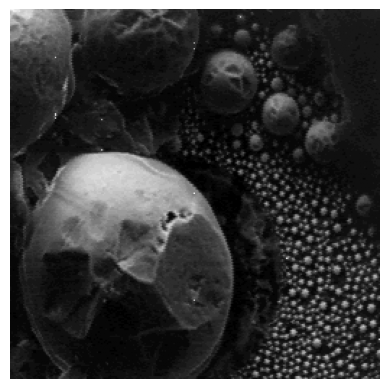

In [3]:
path_meb= "MEB.png"
img_meb = cv2.imread(path_meb, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_meb, cmap="gray")
plt.axis("off")
plt.show()

2. Visualización del histograma

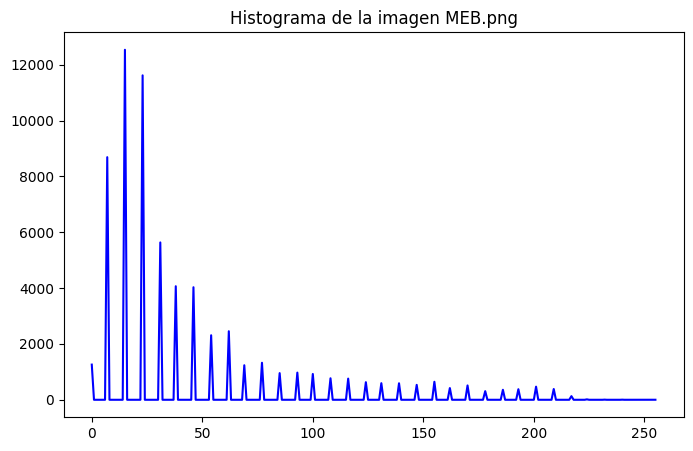

In [4]:
hist_meb = cv2.calcHist([img_meb ], [0], None, [256], [0, 256])

plt.figure(figsize=(8, 5)) 
plt.plot(hist_meb, color='blue')

plt.title('Histograma de la imagen MEB.png')
plt.show()

3. Describa su forma: ¿es continuo/discontinuo?, ¿cuántos niveles de gris diferentes tiene?,

¿cuáles son estos niveles de gris?

4. Partiendo del histograma, deduzca con cuántos bits ha sido numerizada esta imagen.

5. Aplicación filtro promedio

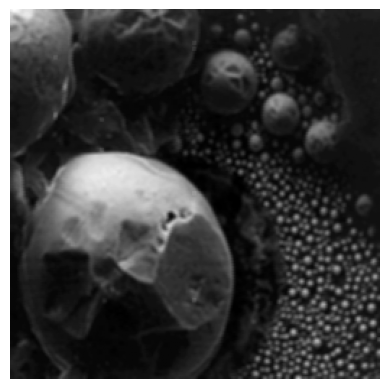

In [6]:
avg = mean(img_meb, footprint_rectangle((3,3)))

plt.imshow(avg, cmap="gray")
plt.axis("off")
plt.show()

Cualitativamente, ¿cómo es la imagen resultado?

6. Visualización del nuevo histograma

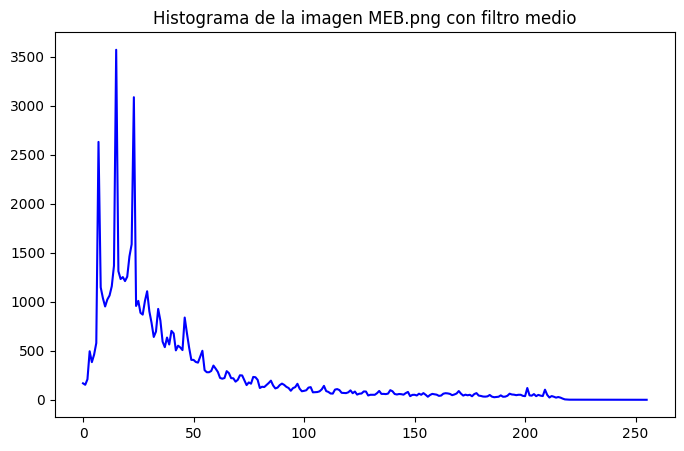

In [7]:
hist_meb_filtro_med = cv2.calcHist([avg ], [0], None, [256], [0, 256])

plt.figure(figsize=(8, 5)) 
plt.plot(hist_meb_filtro_med, color='blue')

plt.title('Histograma de la imagen MEB.png con filtro medio')
plt.show()

Compárelo con el histograma de la imagen original 

7. Calcule la imagen de diferencia con la original. 

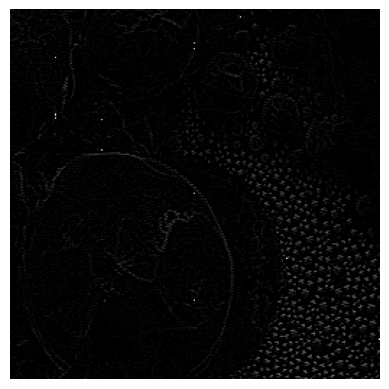

In [11]:
subtraction = cv2.subtract(img_meb, avg)
plt.imshow(subtraction, cmap="gray")
plt.axis("off")
plt.show()

Justifique el resultado obtenido (¿en cuáles regiones de la imagen son visibles las diferencias?, ¿por qué?).

8. Implementación de diversos filtros

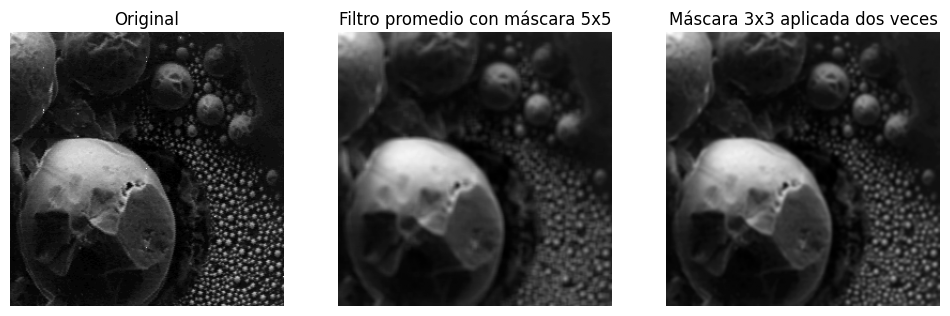

In [ ]:
avg_5x5 = mean(img_meb, footprint_rectangle((5,5)))
avg_3x3_1 = mean(img_meb, footprint_rectangle((3,3)))
avg_3x3_2 = mean(avg_3x3_1, footprint_rectangle((3,3)))

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img_meb, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(avg_5x5, cmap='gray')
plt.title("Filtro promedio con máscara 5x5")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(avg_3x3_2, cmap='gray')
plt.title("Máscara 3x3 aplicada dos veces")
plt.axis("off")

plt.show()

Haga una evaluación visual de los resultados: ¿las dos imágenes obtenidas son idénticas? ¿por qué? ¿cuál de los dos tratamientos suprime mejor los cambios de nivel de gris de la imagen?

9. ¿Cuál es entonces la máscara resultante de la convolución de la máscara del filtro promedio 3x3 con ella misma? ¿Cómo es la máscara del filtro promedio 5x5? Con base en la forma de estas dos máscaras, justifique los resultados visuales obtenidos en el punto anterior.

10. Filtro promedio con máscara de 25x25

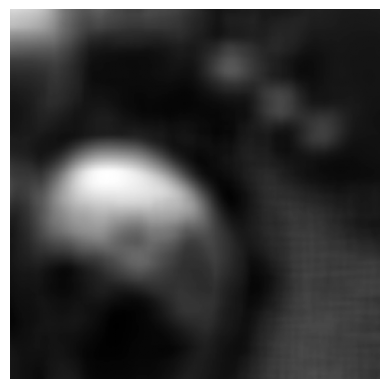

In [13]:
avg_25x25 = mean(img_meb, footprint_rectangle((25,25)))

plt.imshow(avg_25x25, cmap="gray")
plt.axis("off")
plt.show()

Haga una evaluación visual del resultado: ¿qué objetos de la imagen original se conservaron?¿qué sucedió con las estructuras pequeñas presentes en la imagen original?¿por qué?

- **Comparación entre el filtro promedio y el filtro gaussiano** 

11. Carga y visualización de la iamgen

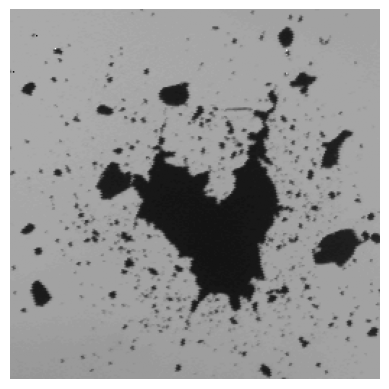

In [14]:
path_impact= "IMPACT.png"
img_impact = cv2.imread(path_impact, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_impact, cmap="gray")
plt.axis("off")
plt.show()

12. Aplicación de filtro promedio con convolución

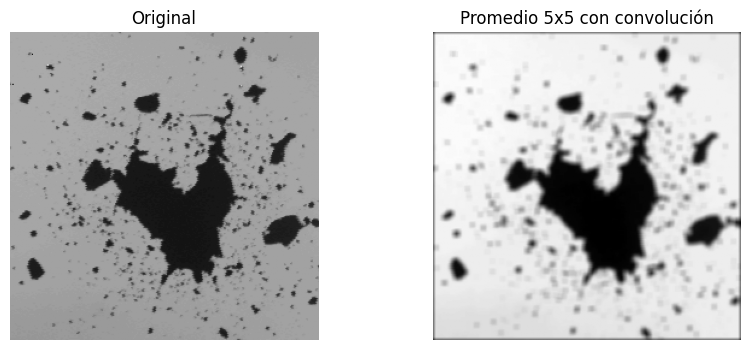

In [15]:
from scipy.ndimage import convolve

kernel_5x5 = np.ones((5, 5)) / 25
filtered_5x5 = convolve(img_impact, kernel_5x5, mode='constant', cval=0)
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img_impact, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(filtered_5x5, cmap='gray')
plt.title("Promedio 5x5 con convolución")
plt.axis("off")

plt.show()

13. Aplicación de filtro Gaussiano con convolución

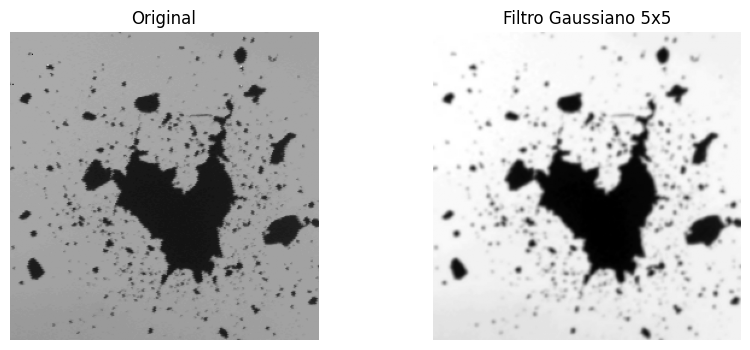

In [24]:
img_float = img_impact.astype(np.float32)

gaussian_kernel_5x5 = np.array([
    [1,  4,  6,  4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1,  4,  6,  4, 1]
], dtype=np.float32)

gaussian_kernel_5x5 /= gaussian_kernel_5x5.sum()

filtered_gaussian = convolve(img_float, gaussian_kernel_5x5, mode='reflect')

filtered_gaussian = np.clip(filtered_gaussian, 0, 255).astype(np.uint8)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img_impact, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(filtered_gaussian, cmap='gray')
plt.title("Filtro Gaussiano 5x5")
plt.axis("off")

plt.show()

14.  Diferencia de los resultados de los dos filtros

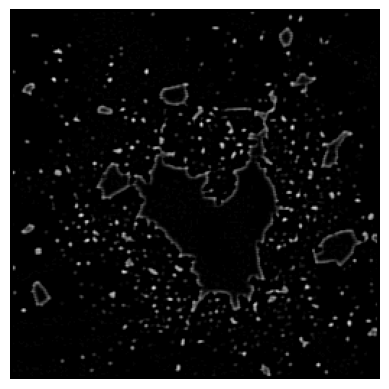

In [25]:
subtraction = cv2.subtract(filtered_5x5, filtered_gaussian)
plt.imshow(subtraction, cmap="gray")
plt.axis("off")
plt.show()

Justifique el resultado obtenido (¿en cuáles regiones de la imagen son visibles las diferencias?, ¿por qué?...).

15. ¿ En qué casos (características de las imágenes) preferiría utilizar un filtro promedio a un filtro gaussiano y visceversa?

### Parte 2: Filtros lineales separables

### Parte 3: Filtros no lineales

### Parte 4: Ejercicio de síntesis taller 5